Hit-or-Miss con OpenCV

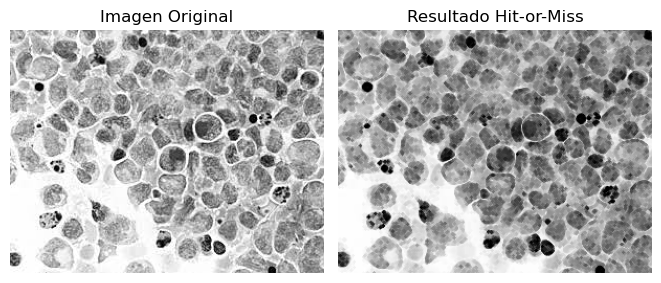

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('cancer.jpg', cv2.IMREAD_GRAYSCALE)

# Definir el elemento estructurante para la parte foreground y background
kernel1 = np.array([[0, 1, 0], 
                    [1, 1, 1], 
                    [0, 1, 0]], dtype=np.uint8)

kernel2 = np.array([[1, 0, 1], 
                    [0, 0, 0], 
                    [1, 0, 1]], dtype=np.uint8)

# Realizar la Transformada Hit-or-Miss
hit_or_miss = cv2.morphologyEx(image, cv2.MORPH_HITMISS, kernel1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title("Imagen Original")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Resultado Hit-or-Miss")
plt.imshow(hit_or_miss, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Hit-or-Miss con scikit - image

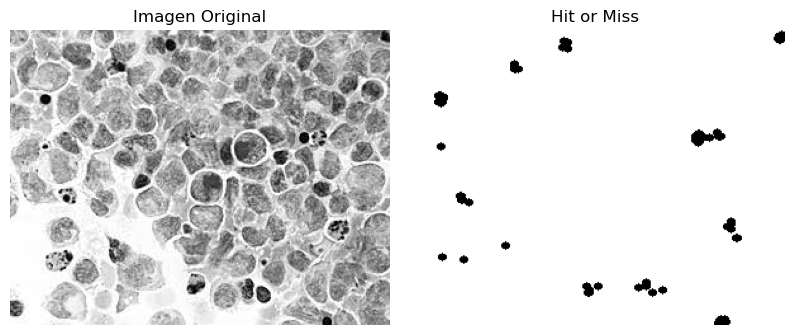

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import binary_erosion, binary_dilation


img = cv2.imread('cancer.jpg', cv2.IMREAD_GRAYSCALE)
_, img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

kernel1 = cv2.getStructuringElement( cv2.MORPH_ELLIPSE, (5,5))
kernel2 = cv2.getStructuringElement( cv2.MORPH_ELLIPSE, (7,7))

eroded1 = binary_erosion(img, kernel1)

eroded2 = binary_erosion(img, kernel2)

res = eroded1 & eroded2


plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3,2)
plt.imshow(res, cmap='gray')
plt.title('Hit or Miss')
plt.axis('off')

plt.tight_layout()
plt.show()


Erosion Geodesica

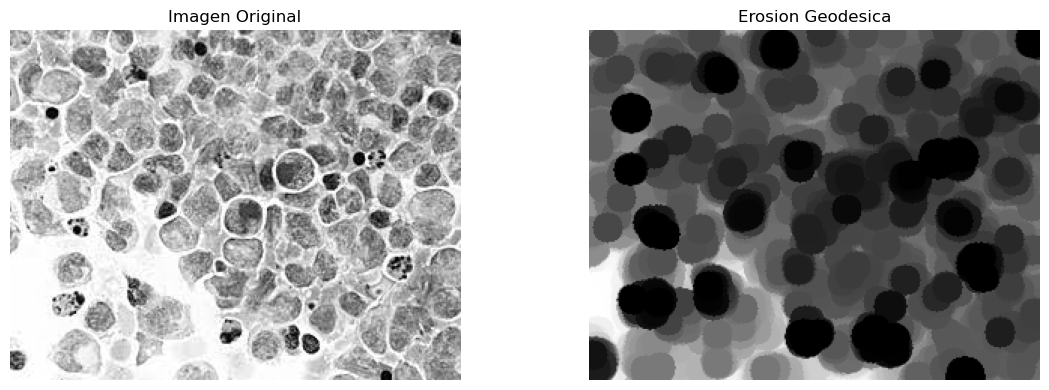

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte, morphology

img = cv2.imread('cancer.jpg', cv2.IMREAD_GRAYSCALE)

marker = morphology.erosion(img, morphology.disk(10))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(marker, cmap='gray')
plt.title('Erosion Geodesica')
plt.axis('off')

plt.tight_layout()
plt.show()


Dilatacion Geodesica

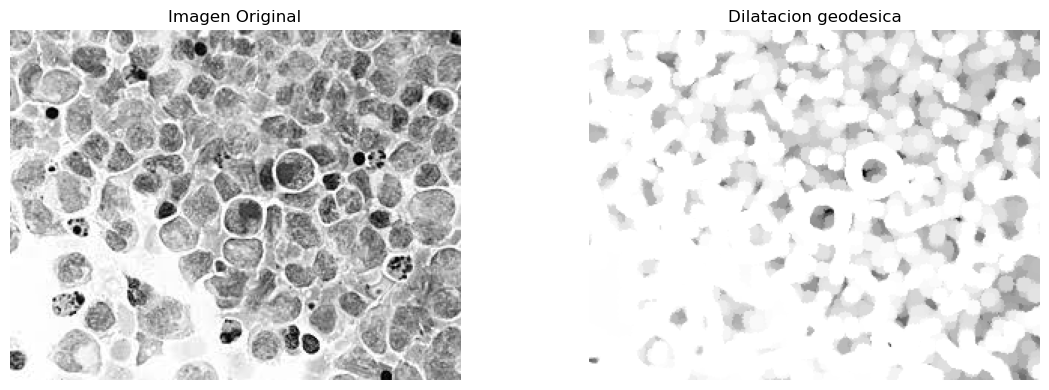

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte, morphology

img = cv2.imread('cancer.jpg', cv2.IMREAD_GRAYSCALE)

size = 5

reconstructed = morphology.dilation(img, morphology.disk(size))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed, cmap='gray')
plt.title('Dilatacion geodesica')
plt.axis('off')

plt.tight_layout()
plt.show()
